evaluacion de modelo a través de cos similarity

computa la métrica de error: $$ \frac{\#(Eval_{reales} \cap Eval_{actual})}{\#Eval_{reales}} $$

In [10]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity
pd.options.mode.chained_assignment = None  # default='warn'

from joblib import dump, load

## datos de evaluador y topico

In [11]:
topicos_evaluador = load('../../trained_models/archivos/topicos_por_evaluador.pkl')
topicos_evaluador.reset_index(drop=False,inplace=True)
usuario_entreanado = topicos_evaluador["CVU"].tolist()
rcea_entreanado = topicos_evaluador["CVU"].tolist()
topicos_evaluador.head(3)

,CVU,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,18,0.086810,0.081637,0.099403,0.000250,0.009172,0.144556,0.103115,0.002653,0.014115,...,0.118634,0.000004,0.061256,0.262423,0.009177,0.007125,0.008626,0.102569,0.144209,0.039317
1,81,0.209278,0.605444,0.101348,0.134260,0.104812,0.438194,0.080647,0.078449,0.114698,...,0.150847,0.024618,0.112175,0.239915,0.070479,0.027360,0.137203,0.287190,0.030302,0.077800
2,83,0.296940,0.199612,0.699568,0.207731,0.664744,0.284005,0.225124,0.394924,0.084003,...,0.171369,0.080001,0.090349,0.146012,0.176794,0.054481,0.146549,0.205168,0.156217,0.292947


## datos de proyecto a evaluar

In [13]:
topicos_texto = load("../../trained_models/archivos/topicos_por_texto_train.pkl")
topicos_texto.drop_duplicates("ID_PROYECTO", inplace=True)
id_proyecto_index = topicos_texto["ID_PROYECTO"].tolist()
topicos_texto.head(2)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,ID_PROYECTO
35982,0.360414,0.191550,0.174587,0.669427,0.135799,0.186962,0.229932,0.396935,0.039526,0.039584,...,0.126096,0.216580,0.101578,0.066345,0.196298,0.09827,0.134691,0.028444,0.134081,3236
27324,0.291972,0.208349,0.022473,0.074464,0.101602,0.119380,0.129230,0.016641,0.259195,0.455622,...,0.061677,0.089401,0.042689,0.059169,0.066179,0.13949,0.086493,0.121838,0.112938,257802


In [14]:
topicos_texto.shape

(654, 101)

### cosine similarity

In [15]:
cos_simi = cosine_similarity(topicos_evaluador.iloc[:,1:], topicos_texto.iloc[:,:-1])

df_cos_simi = pd.DataFrame(cos_simi)

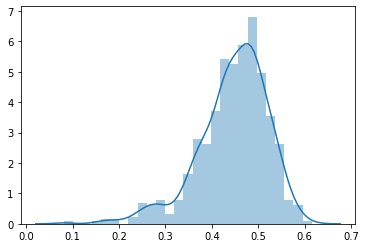

In [16]:
sns.distplot(df_cos_simi.mean(axis=0))

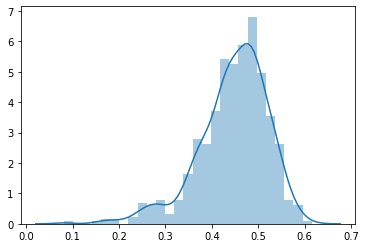

In [17]:
sns.distplot(df_cos_simi.mean(axis=0))

In [18]:
df_cos_simi.shape

(651, 654)

In [19]:
df_cos_simi.head()

,0,1,2,3,4,5,6,7,8,9,...,644,645,646,647,648,649,650,651,652,653
0,0.438089,0.319089,0.285840,0.248146,0.458589,0.302708,0.340552,0.259030,0.443332,0.488615,...,0.447989,0.411184,0.382833,0.208181,0.540396,0.387034,0.462388,0.246347,0.212839,0.467153
1,0.661031,0.566943,0.583140,0.384517,0.721633,0.586848,0.599880,0.480937,0.637754,0.464130,...,0.683146,0.535989,0.476117,0.423154,0.714891,0.502399,0.616361,0.330993,0.490445,0.606062
2,0.737133,0.507889,0.502061,0.556880,0.681066,0.715917,0.674058,0.471212,0.710740,0.543084,...,0.679080,0.555835,0.653480,0.411946,1.000000,0.554732,0.613047,0.309387,0.403622,0.502943
3,0.556063,0.374809,0.317875,0.235878,0.440191,0.381526,0.362288,0.324961,0.362233,0.382568,...,0.403299,0.337436,0.436701,0.329050,0.515833,0.364565,0.470314,0.307145,0.383107,0.202384
4,0.527508,0.553211,0.552590,0.421586,0.634862,0.486819,0.453452,0.574316,0.561331,0.331470,...,0.549502,0.362196,0.333853,0.387297,0.506817,0.464527,0.565425,0.308317,0.352646,0.461297


## encontrar top algom

encontramos elpercentil 97 por fila

In [20]:
df_evaluadores_recomendados = pd.DataFrame(index=[i for i in range(len(id_proyecto_index))]
                                           ,columns=["evaluador_reco_"+str(number) for number in range(5)])
len_list = []

for proyecto in range(df_cos_simi.shape[1]):
    
    list_each_proyecto = df_cos_simi.iloc[:,proyecto].tolist()
    
    
    top_5_idx = np.argsort(list_each_proyecto)[-5:][::-1].tolist()
    #  top_5_idx = [i for i in top_5_idx]

    df_evaluadores_recomendados.iloc[proyecto,:] = [usuario_entreanado[pos] for pos in top_5_idx] 
    
df_evaluadores_recomendados["ID_PROYECTO"] = id_proyecto_index
df_evaluadores_recomendados.set_index("ID_PROYECTO").reset_index(inplace=True,drop=False)

### verificar pertenencia

In [20]:
df_texto_eval = load("../../data/entrenamiento/datos_training_n_eval_5_sample.pkl")

In [21]:
df_texto_eval.head(2)

,CVU,IVIGENCIA,FVIGENCIA,NIVEL,ID_PROYECTO,NUMERO_CONVOCATORIA,ANIO,PALABRAS_CLAVE,SUBDISCIPLINA,DISCIPLINA,AREA,TITULO,DESCRIPCION_PROYECTO
0,83,2008-01-02,2022-12-31 00:00:00,1,619,PROBLEMAS-2015-01,2015,"Energía eólica y solar,uso agrícola,automatiza...",AUTOMATIZACION Y CONTROL,INGENIERÍA ELÉCTRICA,INGENIERÍA Y TECNOLOGÍA,Estación Híbrida de energía eólica y solar par...,titul propuest estacion hibr energi eolic sol ...
1,83,2008-01-02,2022-12-31 00:00:00,1,1779,PROBLEMAS-2015-01,2015,"celda de combustible regenerativa,celdas solar...",GENERACION,INGENIERÍA ELÉCTRICA,INGENIERÍA Y TECNOLOGÍA,Implementación de sistemas híbridos celdas sol...,implementacion sistem hibr celd solaresccru si...


In [22]:
df_texto_eval.shape

(40201, 13)

In [23]:
df_texto_eval = df_texto_eval.reset_index(drop=True)
df_texto_eval = df_texto_eval[["ID_PROYECTO","CVU"]]
df_texto_eval.dropna(inplace=True)
df_texto_eval["CVU"] = df_texto_eval["CVU"].astype(int).astype(str)

In [24]:
df_texto_eval = df_texto_eval.groupby('ID_PROYECTO')['CVU'].apply(lambda x: "[%s]" % ', '.join(x))
df_texto_eval.head()

ID_PROYECTO
5                     [12968, 43387]
11    [26238, 10310, 216522, 122691]
13             [16035, 21964, 30518]
15                           [44116]
16                            [2808]
Name: CVU, dtype: object

In [25]:
df_proy_usuarios = pd.DataFrame(index=df_texto_eval.index, columns=["USUARIOS"])
df_proy_usuarios.iloc[:,0] = df_texto_eval.values
df_proy_usuarios.reset_index(drop=False,inplace=True)
df_proy_usuarios.head()

,ID_PROYECTO,USUARIOS
0,5,"[12968, 43387]"
1,11,"[26238, 10310, 216522, 122691]"
2,13,"[16035, 21964, 30518]"
3,15,[44116]
4,16,[2808]


## proyectos en conjunto de prueba

In [26]:
df_evaluadores_recomendados = df_evaluadores_recomendados.merge(df_proy_usuarios,on="ID_PROYECTO")
df_evaluadores_recomendados.head(10)

,evaluador_reco_0,evaluador_reco_1,evaluador_reco_2,evaluador_reco_3,evaluador_reco_4,ID_PROYECTO,USUARIOS
0,38816,1714,120589,6610,120569,220894,[38816]
1,38975,2822,216753,76113,69517,220776,"[33769, 38975]"
2,111405,33007,3450,213905,1981,160891,"[7717, 205805, 121381, 111405, 21708]"
3,60710,16252,20191,122673,6675,241369,[60710]
4,22123,5720,253364,21764,2200,134245,"[13824, 22123]"
5,10830,1093,13953,19150,11326,238404,"[156, 26087, 292286, 10830, 10979, 21694, 1611..."
6,3221,213940,111405,8720,83675,173801,[3221]
7,202809,122236,15372,6447,121800,164963,"[202809, 93516]"
8,39897,15934,121120,48518,26075,256484,"[1854, 39897]"
9,30574,9975,8661,120542,21443,271666,[30574]


contamos cuantos si los 5 evals propuestos estan en los evaluadores reales:

In [27]:
matches_list = []
for proyecto in range(len(df_evaluadores_recomendados)):
    
    lista_evaluadores_reales = df_evaluadores_recomendados.iloc[proyecto,-1].replace(
        ']','').replace(" ","").replace('[','').replace('"','').split(",")
    
    lista_matches = len([ev_recom for ev_recom in df_evaluadores_recomendados.iloc[proyecto,:-2].tolist()
                         if str(ev_recom) in lista_evaluadores_reales])
    lista_eval_len = len(lista_evaluadores_reales)
    
    metrica = lista_matches/lista_eval_len
    
    matches_list.append(metrica)

df_evaluadores_recomendados["metrica"] = matches_list



In [28]:
df_evaluadores_recomendados.sample(10)

,evaluador_reco_0,evaluador_reco_1,evaluador_reco_2,evaluador_reco_3,evaluador_reco_4,ID_PROYECTO,USUARIOS,metrica
106,2445,19771,63,40120,22046,60017,"[25642, 2445]",0.50
273,123085,224537,7140,3077,120338,282299,[123085],1.00
69,22192,121082,9989,120429,16591,121484,[22192],1.00
104,243619,7717,252710,32071,16563,3249,"[96645, 89555, 243619, 10337]",0.25
185,131237,4284,203310,19033,20332,264875,[131237],1.00
194,122757,38532,30380,76154,121726,156109,[122757],1.00
266,45022,161019,286103,18958,30566,2015,[45022],1.00
138,122866,2098,11235,67,18794,166648,"[202004, 122866, 200813, 15259, 7101]",0.20
315,50999,9391,12656,14685,16508,206484,"[50999, 38217]",0.50
523,20191,16252,60710,6675,122673,278979,"[20191, 209792]",0.50


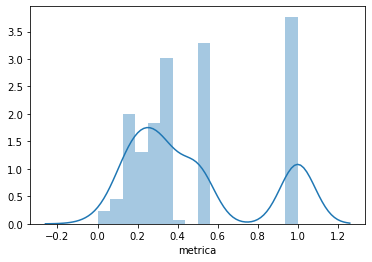

In [29]:
sns.distplot(df_evaluadores_recomendados["metrica"])

In [30]:
df_evaluadores_recomendados["metrica"].mean()

0.4704479307198341

## función empaquetada

computa la métrica de error: $$ \frac{\#( Eval_{reales} \cap Eval_{actual})}{\#Eval_{reales}} $$

In [34]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
pd.options.mode.chained_assignment = None  # default='warn'
from joblib import load, dump
from sklearn.metrics.pairwise import cosine_similarity

In [35]:
def cosine_similarity_metric(
        df_evaluador_topico_,
        df_texto_topico_,
        df_texto_eval_,
        evaluadores_sugeridos):
    """
    obtiene la metrica para el conjunto
    de prueba

    Devuelve una lista con la metrica por proyecto evaludo

    """
    #  df_evaluador_topico_

    df_evaluador_topico_.reset_index(drop=False, inplace=True)
    usuario_entreanado = df_evaluador_topico_["CVU"].tolist()
    rcea_entreanado = df_evaluador_topico_["CVU"].tolist()

    # avealuar

    id_proyecto_index = df_texto_topico_["ID_PROYECTO"].tolist()
    # cos simi

    cos_simi = cosine_similarity(topicos_evaluador.iloc[:,1:], topicos_texto.iloc[:,:-1])
    df_cos_simi = pd.DataFrame(cos_simi)

    # top eval

    df_evaluadores_recomendados = pd.DataFrame(
        index=[i for i in range(len(id_proyecto_index))],
        columns=["evaluador_reco_" + str(number)
                 for number in range(evaluadores_sugeridos)])
    len_list = []
    for proyecto in range(df_cos_simi.shape[1]):

        list_each_proyecto = df_cos_simi.iloc[:, proyecto].tolist()

        top_5_idx = np.argsort(list_each_proyecto)[-evaluadores_sugeridos:][::-1].tolist()
        #  top_5_idx = [i for i in top_5_idx]

        df_evaluadores_recomendados.iloc[proyecto, :] = [
            usuario_entreanado[pos] for pos in top_5_idx]

    df_evaluadores_recomendados["ID_PROYECTO"] = id_proyecto_index

    df_evaluadores_recomendados.set_index(
        "ID_PROYECTO").reset_index(inplace=True, drop=False)

    # comparar contextos evaluador

    df_texto_eval_["CVU"] = df_texto_eval_[
        "CVU"].astype(int).astype(str)
    df_texto_eval_ = df_texto_eval_[["ID_PROYECTO", "CVU"]]
    df_texto_eval_ = df_texto_eval_.groupby(
        'ID_PROYECTO')['CVU'].apply(
        lambda x: "[%s]" % ', '.join(x))
    
    df_proy_usuarios = pd.DataFrame(
        index=df_texto_eval_.index, columns=["USUARIOS"])
    df_proy_usuarios.loc[:,"USUARIOS"] = df_texto_eval_
    df_proy_usuarios.reset_index(drop=False, inplace=True)

    # merge textos con conjunto de prueba

    df_evaluadores_recomendados = df_evaluadores_recomendados.merge(
        df_proy_usuarios, on="ID_PROYECTO")
    matches_list = []

    for proyecto in range(len(df_evaluadores_recomendados)):
        lista_evaluadores_reales = df_evaluadores_recomendados.iloc[
            proyecto, -1].replace(
            ']', '').replace(
            " ", "").replace('[', '').replace('"', '').split(",")

        lista_matches = len([ev_recom
                            for ev_recom
                            in df_evaluadores_recomendados.iloc[
                                proyecto, :-2].tolist()
                            if str(ev_recom) in lista_evaluadores_reales])

        lista_eval_len = len(lista_evaluadores_reales)

        metrica = lista_matches/lista_eval_len

        matches_list.append(metrica)

    df_evaluadores_recomendados["metrica"] = matches_list

    return df_evaluadores_recomendados["metrica"].mean()

    #  return df_evaluadores_recomendados


In [37]:
#topicos_evaluador = load('../trained_models/archivos/topicos_por_evaluador.pkl')
topicos_evaluador = load('../../trained_models/archivos/topicos_por_evaluador.pkl')
topicos_texto = load("../../trained_models/archivos/topicos_por_texto_train.pkl")
topicos_texto.drop_duplicates("ID_PROYECTO", inplace=True)
df_texto_eval = pd.read_csv("../../data/entrenamiento/data_training.csv")

In [38]:
df_evaluadores_recomendados = cosine_similarity_metric(topicos_evaluador,topicos_texto,df_texto_eval,evaluadores_sugeridos=10)
df_evaluadores_recomendados

0.18624873841636874